In [9]:
from fast_ultrametrics import *

# Others libraries
import numpy as np
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, fcluster, cut_tree
from matplotlib import pyplot as plt

In [80]:
# Load datasets
n_samples = 50
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=3)[0]

# Basic use
Simply call
```python
ultrametric(X)
```
where X is the set of points for which you want to compute an ultrametric. The output is a linkage matrix as in scipy.cluster.hierarchy.

In [81]:
X = noisy_circles
ultrametric_noisy_circles = ultrametric(X) # Compute the ultrametric as a linkage matrix
ultrametric_noisy_circles[:10] # the linkage matrix in the following format: each row corresponds to a node with index_left_child, index_right_child, height, size

array([[25.        , 41.        ,  0.16537583,  2.        ],
       [30.        , 31.        ,  0.2101331 ,  2.        ],
       [ 7.        , 27.        ,  0.39983902,  2.        ],
       [35.        , 45.        ,  0.42335365,  2.        ],
       [15.        , 18.        ,  0.43660236,  2.        ],
       [ 1.        , 14.        ,  0.43833342,  2.        ],
       [55.        , 22.        ,  0.50417132,  3.        ],
       [ 5.        ,  6.        ,  0.51429617,  2.        ],
       [ 4.        , 52.        ,  0.5186841 ,  3.        ],
       [19.        , 40.        ,  0.53928371,  2.        ]])

We can now use all scipy algorithms that manipulates linkage matrices (see https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). Below are a few examples.

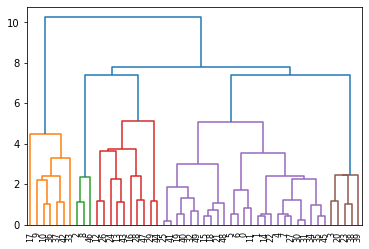

In [82]:
dendrogram(ultrametric_noisy_circles)
plt.show()

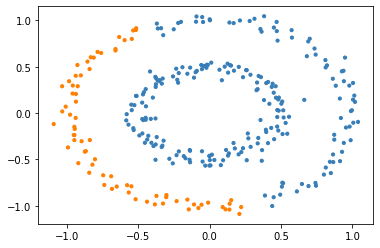

In [50]:
n_clusters = 2
n_samples = 300
X = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)[0]
ultrametrics_noisy_circles = ultrametric(X)
C = cut_tree(ultrametrics_noisy_circles, n_clusters) 
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
COLORS = [colors[y[0]] for y in C]
plt.scatter(X[:, 0], X[:, 1], s=10, color=COLORS)
plt.show()

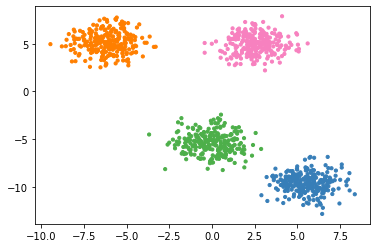

In [46]:
n_samples = 1000
blobs = datasets.make_blobs(n_samples=n_samples,centers=4,cluster_std=1.1, random_state=10)[0]
ultrametric_blobs = ultrametric(blobs)
n_clusters = 4
X = blobs
C = cut_tree(ultrametric_blobs, n_clusters) 
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
COLORS = [colors[y[0]] for y in C]
plt.scatter(X[:, 0], X[:, 1], s=10, color=COLORS)
plt.show()

# Bigger datasets
Let's now turn on a larger dataset to see the impact of the parameters on the tradeoff between running time and accuracy.

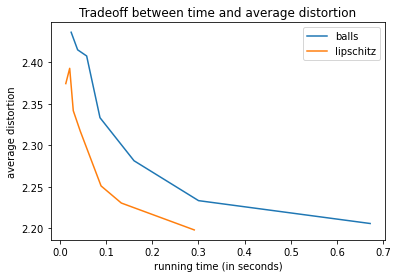

In [84]:
from fast_ultrametrics.distortion import *
import time

X = datasets.load_diabetes()['data']
N = 50 # number of tests
def test(X, lsh):
    res = []
    for param in [1.02, 1.05, 1.1, 1.2, 1.3, 1.5, 2]:
        dist = 0
        chrono = 0
        for i in range(N):
            chrono -= time.perf_counter()
            result = ultrametric(X, scale_factor = param, lsh = lsh)
            chrono += time.perf_counter()
            dist += average_distortion(X, result)
        res.append((dist/N, chrono/N))
    return res
for lsh in ['balls', 'lipschitz']:
    score = test(X,lsh)
    plt.plot([t for ( _, t) in score], [d for (d, _) in score], label=lsh)
plt.legend()
plt.title('Tradeoff between time and average distortion')
plt.xlabel('running time (in seconds)')
plt.ylabel('average distortion')
plt.show()